# **AP157 Machine Learning Lab Assignment**
## Module A.2: Classification -- Morphological Classification of Galaxies using Decision Trees

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1, 2, and 3 are worth 20, 40, and 40 points, respectively).

_Credits_: This assignment is based on the Week 6 module of the Coursera course "Data-driven Astronomy", "Exploring machine learning classification" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

### Student Information

_Full Name (Last Name, First Name)_: Javier, Michael Adrian M.\
_Student No._: 2019-04177\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/40
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the binary file ```galaxy_catalogue.npy``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```galaxy_catalogue.npy``` from your Google Drive folder.

Mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [192]:
from google.colab import drive
drive.mount("/content/drive")

ModuleNotFoundError: No module named 'google'

Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [2]:
file_path = "C:\Users\Ian\Desktop\Files ni Ian\New Files\10th Sem\App_Physics_157"

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (254818620.py, line 1)

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.





In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"

data = np.load('galaxy_catalogue.npy')
data_df = pd.DataFrame(data)

Print out the first couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

In [36]:
data_df

,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,petroR50_u,petroR50_r,petroR50_z,petroR90_u,petroR90_r,petroR90_z,class
0,1.85765,0.67158,0.42310,0.30610,0.585428,2.251946,2.339849,2.380652,2.359738,2.395528,3.095123,3.818919,3.826230,5.174814,8.263009,11.477340,merger
1,1.74259,0.86085,0.44927,0.28851,0.749812,2.031566,2.084156,2.092272,2.124075,2.133154,1.430436,1.422533,1.385727,3.732712,3.416921,3.330347,merger
2,2.10697,0.96710,0.56810,0.33747,0.630089,1.992887,2.450746,2.473116,2.465324,2.438683,3.099957,3.623704,3.463300,9.110857,8.354343,11.265390,merger
3,1.22840,0.60446,0.39049,0.28913,0.668999,2.056115,2.182252,2.309510,2.391414,2.472397,3.627267,4.063471,3.717708,9.580675,12.202420,11.826220,merger
4,1.80792,0.78124,0.45528,0.35067,0.500170,2.259167,2.194723,2.264567,2.334713,2.352568,3.256751,3.153533,2.254511,9.206746,9.790146,6.636931,merger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,1.34594,0.64285,0.37813,0.23107,0.779956,2.421518,2.248886,2.589488,2.615007,2.601444,13.877220,11.936910,11.337210,32.374710,25.266770,25.934250,spiral
776,1.19482,0.49611,0.31017,0.16244,0.722125,2.211442,2.294102,2.327795,2.371559,2.358487,3.032364,3.348147,3.062732,5.833694,8.061935,7.840197,spiral
777,1.21489,0.57253,0.35423,0.21312,0.793392,2.264709,2.319192,2.388157,2.392148,2.384103,4.652165,4.031008,3.122812,9.610085,9.280005,6.708179,spiral
778,1.41797,0.86460,0.40020,0.35307,0.835901,2.011354,2.023669,2.326873,2.676343,2.560389,5.442954,4.227347,3.774427,16.256520,7.738220,7.865478,spiral


#### PART 1 - Get features and targets *(20 pts.)*

Write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In our case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.

Here's an example of how your function should work:
```
>>> features, targets = get_features_targets(data)
>>> print("Features shape:", features.shape
>>> print("Targets shape:", targets.shape)
Features shape: (780, 13)
Targets shape: (780,)
```

Since we want the concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands, we want to divide the columns ``petroR50_u`` and ``petroR90_u`` element-wise. 

In [37]:
r_5090u = data_df.iloc[:, 10]/data_df.iloc[:, 13]
r_5090r = data_df.iloc[:, 11]/data_df.iloc[:, 14]
r_5090z = data_df.iloc[:, 12]/data_df.iloc[:, 15]

We then want to remove the concentration columns and replace them with the concentration ratios. We also want to remove the ``classes`` columns. We can remove that using ``pandas.DataFrame.drop(['name', 'name1', ...])``

In [38]:
data_clean = data_df.drop(columns=['petroR50_u', 'petroR50_r', 'petroR50_z', 'petroR90_u', 'petroR90_r', 'petroR90_z', 'class'])
data_clean['R5090_u'] = r_5090u
data_clean['R5090_r'] = r_5090r
data_clean['R5090_z'] = r_5090z
data_clean

,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,R5090_u,R5090_r,R5090_z
0,1.85765,0.67158,0.42310,0.30610,0.585428,2.251946,2.339849,2.380652,2.359738,2.395528,0.598113,0.462170,0.333373
1,1.74259,0.86085,0.44927,0.28851,0.749812,2.031566,2.084156,2.092272,2.124075,2.133154,0.383216,0.416320,0.416091
2,2.10697,0.96710,0.56810,0.33747,0.630089,1.992887,2.450746,2.473116,2.465324,2.438683,0.340249,0.433751,0.307428
3,1.22840,0.60446,0.39049,0.28913,0.668999,2.056115,2.182252,2.309510,2.391414,2.472397,0.378602,0.333005,0.314361
4,1.80792,0.78124,0.45528,0.35067,0.500170,2.259167,2.194723,2.264567,2.334713,2.352568,0.353735,0.322113,0.339692
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,1.34594,0.64285,0.37813,0.23107,0.779956,2.421518,2.248886,2.589488,2.615007,2.601444,0.428644,0.472435,0.437152
776,1.19482,0.49611,0.31017,0.16244,0.722125,2.211442,2.294102,2.327795,2.371559,2.358487,0.519802,0.415303,0.390645
777,1.21489,0.57253,0.35423,0.21312,0.793392,2.264709,2.319192,2.388157,2.392148,2.384103,0.484092,0.434376,0.465523
778,1.41797,0.86460,0.40020,0.35307,0.835901,2.011354,2.023669,2.326873,2.676343,2.560389,0.334817,0.546294,0.479873


Let's check if we can just the the classes right away:

In [39]:
data_class = data_df.iloc[:, 16]
data_class

0      merger
1      merger
2      merger
3      merger
4      merger
        ...  
775    spiral
776    spiral
777    spiral
778    spiral
779    spiral
Name: class, Length: 780, dtype: object

Now we can put them into a function and get the features and targets of a function!

In [40]:
def get_features_targets(data_df):
    # Requires data_df to be a dataframe containing 17 columns and prints out the features (13 columns) and targets (1 column)
    
    # Compute the concentration ratios
    r_5090u = data_df.iloc[:, 10]/data_df.iloc[:, 13]
    r_5090r = data_df.iloc[:, 11]/data_df.iloc[:, 14]
    r_5090z = data_df.iloc[:, 12]/data_df.iloc[:, 15]

    # Get the last column before removal
    targets = data_df.iloc[:, 16]

    # Remove the last 7 columns
    features = data_df.drop(columns=['petroR50_u', 'petroR50_r', 'petroR50_z', 'petroR90_u', 'petroR90_r', 'petroR90_z', 'class'])

    # Add the concentration ratios
    features['R5090_u'] = r_5090u
    features['R5090_r'] = r_5090r
    features['R5090_z'] = r_5090z
    
    return features, targets

In [41]:
features, targets = get_features_targets(data_df)

print("Features shape:", features.shape)
print("Targets shape:", targets.shape)

Features shape: (780, 13)
Targets shape: (780,)


#### PART 2 - Train and run a decision tree model *(40 pts.)*

Write a function ```predict_class``` that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

Here's an example of how your function should work:
```
import numpy as np
from sklearn.tree import DecisionTreeClassifier

data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(3):
   print("%d, %s, %s" & (i, predicted_class[i], actual_class[i]))
```

To split the dataset into an 80:20 split, we need to input `test_size=0.2` so that the other data set is 0.8 or 80%. 

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=0)

We then need to import the decision tree classifier. 

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

We need to fit the dataset first to the decision tree classifier. This is the same as the `np.polyfit` part of the A1 lab assignment

In [44]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

We then need to test our predictions on the `x_test` part of the dataset. This is the `mean_squared_error` part of the A1 lab assignment

In [45]:
y_pred = dtc.predict(x_test)
y_pred

array(['spiral', 'elliptical', 'merger', 'elliptical', 'elliptical',
       'elliptical', 'spiral', 'merger', 'merger', 'spiral', 'merger',
       'elliptical', 'spiral', 'spiral', 'spiral', 'spiral', 'elliptical',
       'elliptical', 'spiral', 'elliptical', 'spiral', 'merger', 'spiral',
       'merger', 'merger', 'spiral', 'spiral', 'spiral', 'merger',
       'merger', 'merger', 'elliptical', 'spiral', 'spiral', 'elliptical',
       'merger', 'spiral', 'elliptical', 'spiral', 'merger', 'merger',
       'merger', 'elliptical', 'merger', 'merger', 'merger', 'spiral',
       'elliptical', 'elliptical', 'merger', 'elliptical', 'elliptical',
       'elliptical', 'spiral', 'spiral', 'elliptical', 'elliptical',
       'merger', 'merger', 'elliptical', 'spiral', 'elliptical',
       'elliptical', 'spiral', 'merger', 'elliptical', 'elliptical',
       'elliptical', 'elliptical', 'elliptical', 'elliptical', 'merger',
       'spiral', 'merger', 'spiral', 'spiral', 'spiral', 'spiral',
       'sp

Let's make ``y_test`` and ``y_pred`` to be a dataframe to compare them directly. 

In [46]:
compare_df = pd.DataFrame()
compare_df['Actual class'] = y_test
compare_df['Predicted class'] = y_pred
compare_df

,Actual class,Predicted class
699,spiral,spiral
327,elliptical,elliptical
210,merger,merger
14,merger,elliptical
413,elliptical,elliptical
...,...,...
52,merger,merger
318,elliptical,elliptical
602,spiral,spiral
494,elliptical,elliptical


Let's make this into a neat little function. 

In [47]:
def predict_class(X, Y):
    # Expects input X being the features of the dataset and Y being the targets of the dataset. 
    # Outputs the predicted class 'y_pred' by the model and the actual class 'y_test' 

    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier()

    # Splitting and training the data
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    dtc.fit(x_train, y_train)
    y_pred = dtc.predict(x_test)

    return y_pred, y_test.to_numpy()

Testing this,

In [48]:
predicted_class, actual_class = predict_class(features, targets)

We need to test if both `predicted_class` and `actual_class` because indexing doesn't work on Pandas series. 

In [49]:
type(actual_class), type(predicted_class)

(numpy.ndarray, numpy.ndarray)

In [50]:
for i in range(3):
   print("%d, %s, %s" % (i, predicted_class[i], actual_class[i]))

0, spiral, spiral
1, elliptical, elliptical
2, merger, merger


#### PART 3 - Confusion matrix and accuracy *(40 pts.)*

1. Get the confusion matrix for your test dataset-- this is a 3 x 3 matrix with the counts for each combination of actual and predicted class. *(25 pts.)*

2. Get the test accuracy of your decision tree classifer, defined as the number of correct predictions divided by the total number of predictions. *(15 pts.)*

Text(-11.5, -4, '             Accuracy for each galaxy type: \nelliptical: 0.85        spiral: 0.79            merger: 0.71')

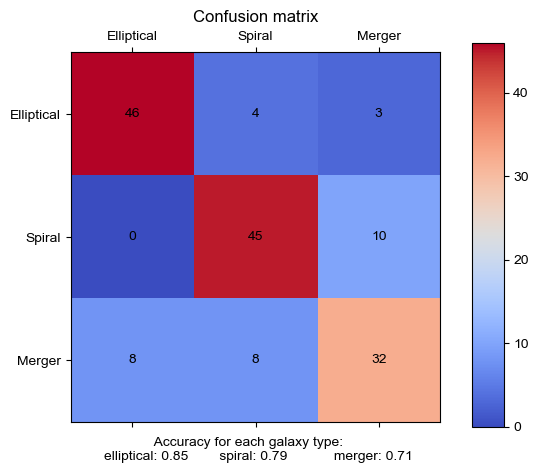

In [52]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

m_con = confusion_matrix(actual_class, predicted_class, labels=['elliptical', 'spiral', 'merger'])

fig, ax = plt.subplots()
cax = fig.add_axes([0.85, 0.1, 0.05, 0.8])
mat = ax.matshow(m_con, cmap='coolwarm')
ax.set_title('Confusion matrix')
fig.colorbar(mat, cax=cax, orientation='vertical')

for i in range(3):
    for j in range(3):
        c = m_con[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

def update_ticks(x, pos):
    if x == 0:
        return 'Elliptical'
    elif x == 1:
        return 'Spiral'
    elif x == 2:
        return 'Merger'

ax.xaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))

ell_true, ell_total = m_con[0, 0], np.sum(m_con[:, 0])
sp_true, sp_total = m_con[1, 1], np.sum(m_con[:, 1])
mer_true, mer_total = m_con[2, 2], np.sum(m_con[:, 2])
ell_acc, sp_acc, mer_acc = ell_true/ell_total, sp_true/sp_total, mer_true/mer_total
plt.text(-11.5, -4, '             Accuracy for each galaxy type: \nelliptical: {ell_acc}        spiral: {sp_acc}        \
    merger: {mer_acc}'.format(ell_acc=round(ell_acc, 2), sp_acc=round(sp_acc, 2), mer_acc=round(mer_acc, 2)))

## Iris dataset

The iris dataset is a csv file that contains 150 flowers measured by their sepal length, sepal width, petal length, and petal width. Their species classification is also included in the data. We can then try to do supervised learning and see if our predicted data is the same with the actual data.

In [54]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# using the attribute information as the column names
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris =  pd.read_csv(csv_url, names = col_names)

In [55]:
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Let's separate the `features` from the `targets`. 

In [56]:
features_iris = iris.drop(columns='Class')
features_iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [57]:
targets_iris = iris.iloc[:, 4]
targets_iris

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 150, dtype: object

Let's see if the predicted class is the same as the actual class. 

In [58]:
predicted_iris, actual_iris = predict_class(features_iris, targets_iris)

Let's see what are all the types of Iris species there are.

In [59]:
np.unique(targets_iris)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Text(-11.5, -1.1, '           Accuracy for each Iris species: \nsetosa: 1.0        versicolor: 1.0            virginica: 1.0')

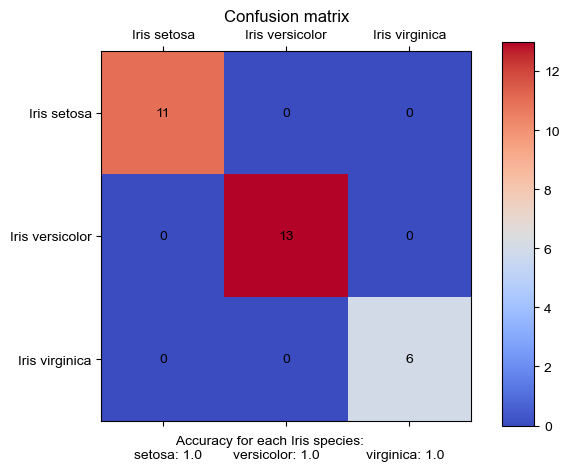

In [67]:
iris_con = confusion_matrix(actual_iris, predicted_iris, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

fig, ax = plt.subplots()
cax = fig.add_axes([0.85, 0.1, 0.05, 0.8])
mat = ax.matshow(iris_con, cmap='coolwarm')
ax.set_title('Confusion matrix')
fig.colorbar(mat, cax=cax, orientation='vertical')

for i in range(3):
    for j in range(3):
        c = iris_con[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

def update_ticks1(x, pos):
    if x == 0:
        return 'Iris setosa'
    elif x == 1:
        return 'Iris versicolor'
    elif x == 2:
        return 'Iris virginica'

ax.xaxis.set_major_formatter(mticker.FuncFormatter(update_ticks1))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(update_ticks1))

set_true, set_total = iris_con[0, 0], np.sum(iris_con[:, 0])
ver_true, ver_total = iris_con[1, 1], np.sum(iris_con[:, 1])
vir_true, vir_total = iris_con[2, 2], np.sum(iris_con[:, 2])
set_acc, ver_acc, vir_acc = set_true/set_total, ver_true/ver_total, vir_true/vir_total
plt.text(-11.5, -1.1, '           Accuracy for each Iris species: \nsetosa: {set_acc}        versicolor: {ver_acc}        \
    virginica: {vir_acc}'.format(set_acc=round(set_acc, 2), ver_acc=round(ver_acc, 2), vir_acc=round(vir_acc, 2)))